# Convolutional Neural Networks

# Importar Librerías

In [369]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [370]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU


# Cargar set de Imágenes

In [371]:
dirname = os.path.join(os.getcwd(),r'E:/ITM_9_IA/Entrega/Practica_4/Imagenes3')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\asalto 1
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\incendio 6709
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\inundacion 9389
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\robo 5529
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\tornado 8765
Directorios leidos: 5
Imagenes en cada directorio [6710, 9389, 5529, 8765, 8435]
suma Total de imagenes en subdirs: 38828


# Creamos las etiquetas

In [372]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  38828


In [373]:
risk=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    risk.append(name[len(name)-1])
    indice=indice+1

0 asalto
1 incendio
2 inundacion
3 robo
4 tornado


In [374]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [375]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (31062, 28, 28, 3) (31062,)
Testing data shape :  (7766, 28, 28, 3) (7766,)


Text(0.5, 1.0, 'Ground Truth : 4')

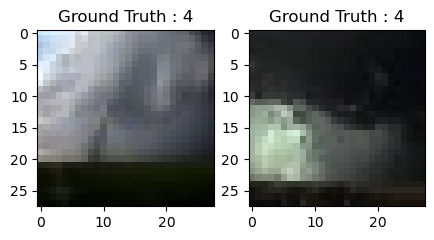

In [376]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

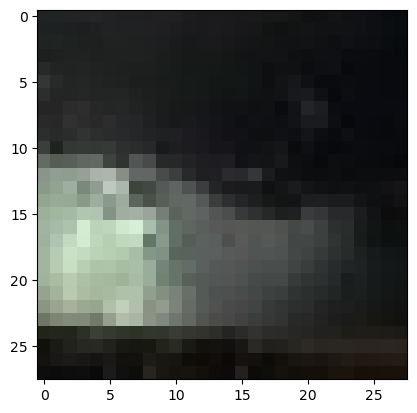

In [377]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [378]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [379]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [380]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(24849, 28, 28, 3) (6213, 28, 28, 3) (24849, 5) (6213, 5)


# Creamos el modelo de CNN

In [381]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 0.001 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001 #1e-3
epochs = 60 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento 20
batch_size = 40 # cantidad de imágenes que se toman a la vez en memoria 64

In [382]:
risk_model = Sequential()
risk_model.add(Input(shape=(28, 28, 3)))  # Medida de las imagenes procesar 28x28
risk_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
risk_model.add(LeakyReLU(alpha=0.1))
risk_model.add(MaxPooling2D((2, 2), padding='same'))
risk_model.add(Dropout(0.5))

risk_model.add(Flatten())
risk_model.add(Dense(32, activation='linear'))
risk_model.add(LeakyReLU(alpha=0.1))
risk_model.add(Dropout(0.5))
risk_model.add(Dense(nClasses, activation='softmax'))

In [383]:
risk_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                200736    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 32)              

In [384]:
INIT_LR = 0.01  # Tasa de aprendizaje inicial #0.01
decay_steps = 100  # Número de pasos de decaimiento (puedes ajustarlo según sea necesario) #100
decay_rate = 0.96  # Factor de decaimiento (puedes ajustarlo según sea necesario) #0.96

# Definir el programador de tasa de aprendizaje
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

# Compilar el modelo con el optimizador actualizado
risk_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
    metrics=['accuracy']
)


# Entrenamos el modelo: Aprende a clasificar imágenes

In [385]:
risk_train = risk_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/60
622/622 [==============================] - 11s 18ms/step - loss: 0.7975 - accuracy: 0.7138 - val_loss: 0.3610 - val_accuracy: 0.9078
Epoch 2/60
622/622 [==============================] - 10s 17ms/step - loss: 0.4319 - accuracy: 0.8661 - val_loss: 0.2547 - val_accuracy: 0.9269
Epoch 3/60
622/622 [==============================] - 11s 18ms/step - loss: 0.3401 - accuracy: 0.9010 - val_loss: 0.2155 - val_accuracy: 0.9433
Epoch 4/60
622/622 [==============================] - 10s 17ms/step - loss: 0.2925 - accuracy: 0.9169 - val_loss: 0.1839 - val_accuracy: 0.9477
Epoch 5/60
622/622 [==============================] - 10s 16ms/step - loss: 0.2670 - accuracy: 0.9243 - val_loss: 0.1673 - val_accuracy: 0.9536
Epoch 6/60
622/622 [==============================] - 11s 17ms/step - loss: 0.2493 - accuracy: 0.9310 - val_loss: 0.1543 - val_accuracy: 0.9567
Epoch 7/60
622/622 [==============================] - 11s 18ms/step - loss: 0.2398 - accuracy: 0.9342 - val_loss: 0.1480 - val_accuracy:

In [386]:
# guardar el modelo en el nuevo formato
risk_model.save("E://ITM_9_IA//Entrega//Practica_4//modelo//risk_model.keras")

# Evaluamos la red

In [387]:
test_eval = risk_model.evaluate(test_X, test_Y_one_hot, verbose=1)

243/243 [==============================] - 1s 5ms/step - loss: 0.1105 - accuracy: 0.9685


In [388]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.11051787436008453
Test accuracy: 0.9684522151947021


In [389]:
risk_train.history

{'loss': [0.7974985241889954,
  0.4318992495536804,
  0.34011057019233704,
  0.2924661934375763,
  0.2670440375804901,
  0.24925215542316437,
  0.2398449331521988,
  0.2271709144115448,
  0.2220383584499359,
  0.2193436473608017,
  0.2113119661808014,
  0.21027904748916626,
  0.20819449424743652,
  0.2058083564043045,
  0.20540578663349152,
  0.2079722136259079,
  0.20326681435108185,
  0.20753102004528046,
  0.20343737304210663,
  0.20316556096076965,
  0.20129771530628204,
  0.20052412152290344,
  0.20315386354923248,
  0.19902588427066803,
  0.2018088698387146,
  0.2016228437423706,
  0.20199273526668549,
  0.20161189138889313,
  0.1979612559080124,
  0.2044954001903534,
  0.20427531003952026,
  0.20430096983909607,
  0.20010912418365479,
  0.19965560734272003,
  0.20344044268131256,
  0.20015165209770203,
  0.20445875823497772,
  0.204081192612648,
  0.20160892605781555,
  0.2074396163225174,
  0.20015165209770203,
  0.2037263810634613,
  0.2019600123167038,
  0.20192627608776093,


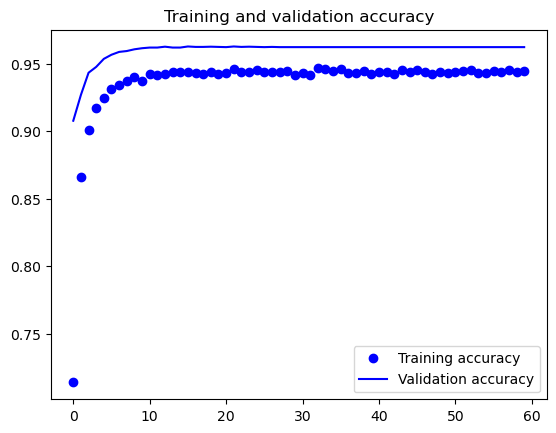

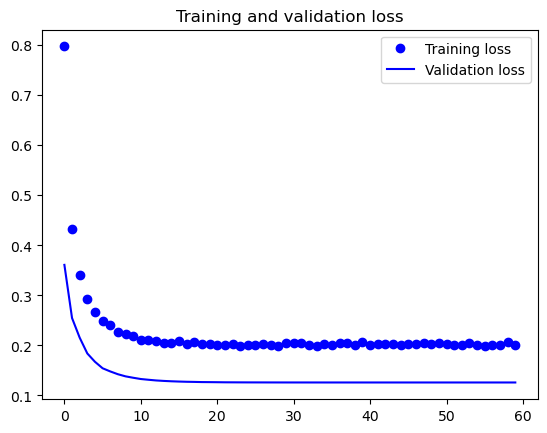

In [390]:
accuracy = risk_train.history['accuracy']
val_accuracy = risk_train.history['val_accuracy']
loss = risk_train.history['loss']
val_loss = risk_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [391]:
predicted_classes2 = risk_model.predict(test_X)

In [392]:
predicted_classes=[]
for predicted_risk in predicted_classes2:
    predicted_classes.append(predicted_risk.tolist().index(max(predicted_risk)))
predicted_classes=np.array(predicted_classes)

In [393]:
predicted_classes.shape, test_Y.shape

((7766,), (7766,))

# Aprendamos de los errores: Qué mejorar

Found 7521 correct labels


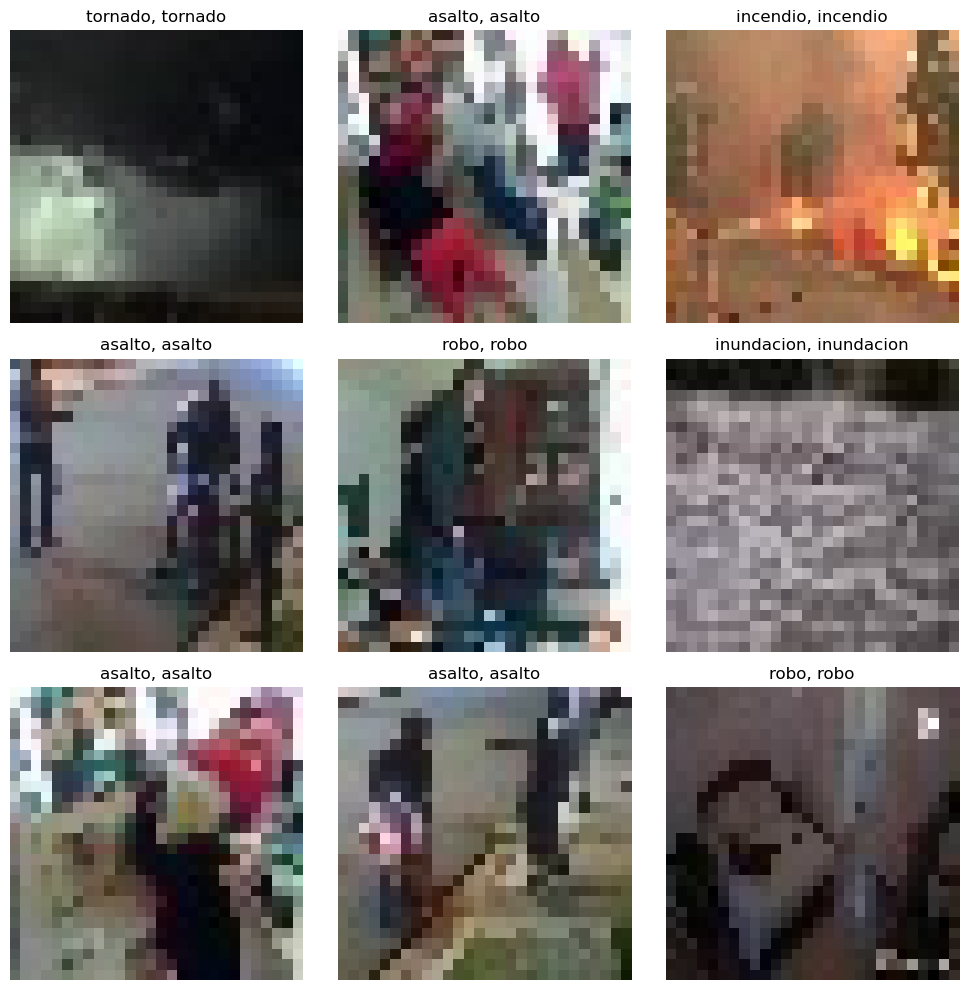

In [394]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))

# Crear una figura
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, correct in enumerate(correct[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[correct].reshape(28, 28, 3), cmap='gray', interpolation='none')
    ax.set_title("{}, {}".format(risk[predicted_classes[correct]], risk[test_Y[correct]]))
    ax.axis('off')  # Opcional: oculta los ejes

plt.tight_layout()
plt.show()

Found 245 incorrect labels


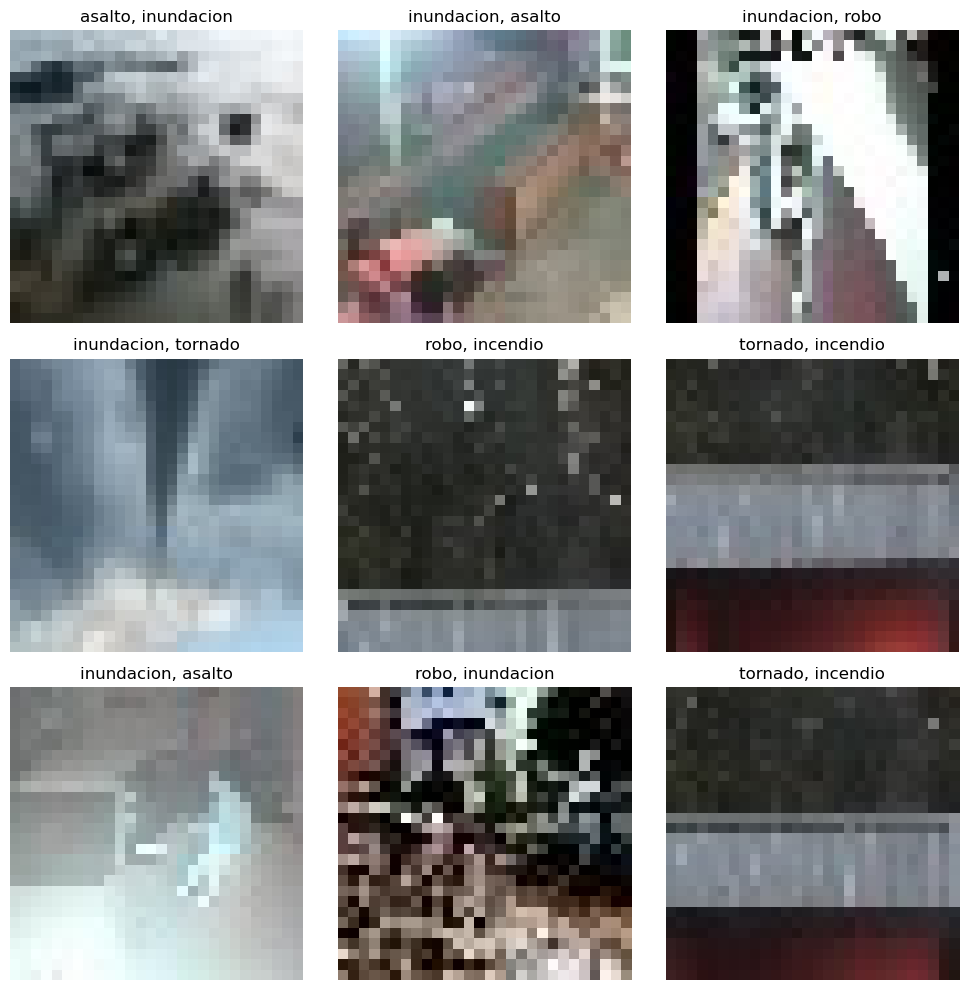

In [395]:
incorrect = np.where(predicted_classes != test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

# Crear una figura
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, incorrect in enumerate(incorrect[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[incorrect].reshape(28, 28, 3), cmap='gray', interpolation='none')
    ax.set_title("{}, {}".format(risk[predicted_classes[incorrect]], risk[test_Y[incorrect]]))
    ax.axis('off')  # Opcional: oculta los ejes

plt.tight_layout()
plt.show()

In [396]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.93      0.96      1344
     Class 1       0.99      0.99      0.99      1865
     Class 2       0.88      0.95      0.91      1073
     Class 3       0.98      0.99      0.98      1796
     Class 4       0.99      0.97      0.98      1688

    accuracy                           0.97      7766
   macro avg       0.96      0.96      0.96      7766
weighted avg       0.97      0.97      0.97      7766



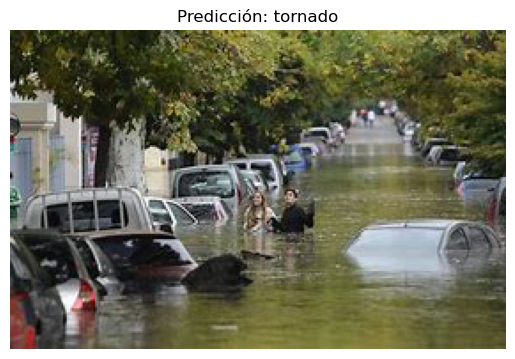

E:/ITM_9_IA/Entrega/Practica_4/prueba/inundacionw9.jpg tornado


In [397]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np

# Definimos una lista para las imágenes y los nombres de archivo
images = []
filenames = [#'E:/ITM_9_IA/Entrega/Practica_4/prueba/asaltow5.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robow1.jpg',
             'E:/ITM_9_IA/Entrega/Practica_4/prueba/inundacionw9.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo_test3.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo1.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo2.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo3.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo4.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo5.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo6.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/inundacion3.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/inundacion1.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/robo_test2.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/asalto3.jpg',
             #'E:/ITM_9_IA/Entrega/Practica_4/prueba/inundacion_test1.jpg'
             #'C:/Users/dante/Downloads/prueba/prueba/asaltoX.jpeg',
             #'C:/Users/dante/Downloads/prueba/prueba/roboH.jpg', #inundacion
             #'C:/Users/dante/Downloads/prueba/prueba/ronoH.jpg', #asalo,
             #'C:/Users/dante/Downloads/prueba/prueba/asal2.jpeg'  #robo
             #'C:/Users/dante/Downloads/prueba/prueba/asalto2.jpeg', #asalto
             #'C:/Users/dante/Downloads/prueba/prueba/robo3.jpeg', #incendio
             #'C:/Users/dante/Downloads/prueba/prueba/robo2.jpeg', #tornado
             #'C:/Users/dante/Downloads/prueba/prueba/inu2.jpeg', #robo
             #'C:/Users/dante/Downloads/prueba/prueba/inuncacion.jpeg', #incendio
             #'C:/Users/dante/Downloads/prueba/prueba/incendioP4.jpg', #incendio
             #'C:/Users/dante/Downloads/prueba/prueba/tornadon1.jpg', #incendio
             #'C:/Users/dante/Downloads/prueba/prueba/tornadon2.jpg', #incendio
             #'C:/Users/dante/Downloads/prueba/prueba/tornadoa1.jpg', #incendio
             #'C:/Users/dante/Downloads/prueba/prueba/tornadov1.jpg', #robo
             #'C:/Users/dante/Downloads/prueba/prueba/tornadov2.jpg', #tornado
             #'C:/Users/dante/Downloads/prueba/prueba/tornadoaa1.jpg', #tornado
             #'C:/Users/dante/Downloads/prueba/prueba/tornadom1.jpg', #inundacion
             #'C:/Users/dante/Downloads/prueba/prueba/tornador1.jpg', #incendio
             #'C:/Users/dante/Downloads/prueba/prueba/tornadob1.jpg',
             #'C:/Users/dante/Downloads/prueba/prueba/roborr1.jpg',
             #'C:/Users/dante/Downloads/prueba/prueba/roborr2.jpg',
             #'C:/Users/dante/Downloads/prueba/prueba/roborr3.jpg',
             #'C:/Users/dante/Downloads/prueba/prueba/roborr4.jpg',
             #'C:/Users/dante/Downloads/prueba/prueba/roborr5.jpg'
             ]

# Iteramos sobre los nombres de archivo para cargar y redimensionar las imágenes
for filepath in filenames:
    image = plt.imread(filepath)  # No especificar 0 para leer en color
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

# Convertimos la lista de imágenes a un array numpy
X = np.array(images, dtype=np.uint8)
test_X = X.astype('float32')
test_X = test_X / 255.0

# Realizamos la predicción usando el modelo
predicted_classes = risk_model.predict(test_X)

# Definimos una lista con las posibles clases (esto depende de tu modelo)
risk = ['asalto', 'incendio', 'inundacion', 'robo', 'tornado']  # Ejemplo de clases

# Iteramos sobre las predicciones y mostramos la imagen con la predicción correspondiente
for i, img_tagged in enumerate(predicted_classes):
    # Mostramos la imagen original
    original_image = plt.imread(filenames[i])  # Cargamos la imagen original para mostrarla
    plt.imshow(original_image)
    plt.title(f"Predicción: {risk[img_tagged.tolist().index(max(img_tagged))]}")
    plt.axis('off')  # Opcional: para ocultar los ejes
    plt.show()
    
    # Imprimimos el nombre del archivo y la predicción
    print(filenames[i], risk[img_tagged.tolist().index(max(img_tagged))])